In [214]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read from json file and convert to pandas dataframe
phone_call_df = pd.read_json('mobilecomputing-7b934-default-rtdb-export.json')

# Extract a dataframe where the userId is the same as the column name
phone_call_df = phone_call_df.transpose()
phone_call_df = phone_call_df.reset_index()
phone_call_df = phone_call_df.rename(columns={'index': 'userId'})

# ====== Data cleaning ======

# Remove userId Agata, bob, chris, rasmus and sarah as they are not part of the experiment

phone_call_df = phone_call_df[phone_call_df['userId'] != 'Agata']
phone_call_df = phone_call_df[phone_call_df['userId'] != 'bob']
# phone_call_df = phone_call_df[phone_call_df['userId'] != 'chris']
# phone_call_df = phone_call_df[phone_call_df['userId'] != 'rasmus']
# phone_call_df = phone_call_df[phone_call_df['userId'] != 'sarah']

# Remove headers
phone_call_arr = phone_call_df[:].values
phone_call_df = pd.DataFrame(phone_call_arr)

# Get a dataframe based on  the userId
def get_user_df(user_id):
    user_df = phone_call_df[phone_call_df[0] == user_id]
    user_df = user_df.dropna(axis=1, how='all')

    # Remove the userId column
    user_df = user_df.drop([0], axis=1)
    user_df = user_df.transpose()
    user_df = user_df.reset_index()
    user_df = user_df.drop(['index'], axis=1)
    user_df = user_df.rename(columns={list(user_df)[0]: 'gestureLog'})

    user_df = pd.DataFrame.from_records(user_df['gestureLog'])

    return user_df

# For each user, get a dataframe and append it to a dataframe
def get_all_users_df():
    all_users_df = pd.DataFrame()
    for user_id in phone_call_df[0]:
        user_df = get_user_df(user_id)
        all_users_df = pd.concat([all_users_df, user_df], ignore_index=True)
    all_users_df = all_users_df.reset_index()
    all_users_df = all_users_df.drop(['index'], axis=1)
    return all_users_df

data_df = get_all_users_df()

# Merge sarah experiments into one
data_df['userId'].replace({'sarah t2': 'sarah T2'}, inplace=True)




In [215]:
# Drop the wrong typing data

data_df_wrong_typing = data_df.loc[data_df['userId'].isin(['chris', 'rasmus', 'sarah']) & (data_df['contextId'] == 'Distracted (Typing)')]
data_df_clean = data_df.drop(data_df_wrong_typing.index)


In [216]:
# Merge all sarah experiments into one
data_df_clean['userId'].replace({'sarah T2': 'sarah'}, inplace=True)

# Merge all chris experiments into one
data_df_clean['userId'].replace({'Chris T2': 'chris'}, inplace=True)

# Merge all rasmus experiments into one
data_df_clean['userId'].replace({'rasmus T2': 'rasmus'}, inplace=True)

data_df_clean[data_df_clean['userId'] == 'Angelos']

,actualGesture,contextId,expectedGesture,responseTime,timeStampAlarmSop,timeStampAlarmStart,userId
0,Touch,Sit,Touch,5974,1685971694200,1685971688226,Angelos
1,Touch,Sit,Touch,5212,1685971705732,1685971700520,Angelos
2,Touch,Sit,Touch,3138,1685971715131,1685971711993,Angelos
3,Touch,Sit,Touch,3203,1685971723661,1685971720458,Angelos
4,FlipHalf,Sit,FlipHalf,4384,1685971845104,1685971840720,Angelos
5,FlipHalf,Sit,FlipHalf,3001,1685971854711,1685971851710,Angelos
6,FlipHalf,Sit,FlipHalf,3011,1685971864123,1685971861112,Angelos
7,FlipHalf,Sit,FlipHalf,3403,1685971874486,1685971871083,Angelos
8,SpinHalf,Sit,SpinHalf,3411,1685971956442,1685971953031,Angelos
9,SpinHalf,Sit,SpinHalf,3406,1685971965656,1685971962250,Angelos


In [217]:
# Group data by userId
data_by_user = data_df_clean.groupby('userId')

# Get how many times the actualGesture is different than the expectedGesture
def get_wrong_gestures(user_df):
    wrong_gestures = 0
    for index, row in user_df.iterrows():
        if row['actualGesture'] != row['expectedGesture']:
            wrong_gestures += 1
    return wrong_gestures

# Get which actualGesture is different than the expectedGesture most often
def get_most_wrong_gesture(user_df):
    wrong_gestures = {}
    for index, row in user_df.iterrows():
        if row['actualGesture'] != row['expectedGesture']:
            if row['actualGesture'] not in wrong_gestures:
                wrong_gestures[row['actualGesture']] = 1
            else:
                wrong_gestures[row['actualGesture']] += 1 
    return max(wrong_gestures, key=wrong_gestures.get, default='-')

print("--------Wrong Gestures per Participant--------")
wrong_gestures = pd.Series.to_frame(data_by_user.apply(get_wrong_gestures))
wrong_gestures.rename(columns={0: "Wrong-Gestures-No"}, inplace=True)
print(wrong_gestures)

print("--------Most Wrong Gesture per Participant--------")
most_wrong_gestures = pd.Series.to_frame(data_by_user.apply(get_most_wrong_gesture))
most_wrong_gestures.rename(columns={0: "Most-Wrong-Gesture"}, inplace=True)
print(most_wrong_gestures)

# print(data_by_user.count())


--------Wrong Gestures per Participant--------
         Wrong-Gestures-No
userId                    
Angelos                  0
Falcon                  10
Gabriel                  0
Katrine                  1
Lotte                    4
chris                    4
rasmus                   9
sarah                   16
--------Most Wrong Gesture per Participant--------
        Most-Wrong-Gesture
userId                    
Angelos                  -
Falcon            FlipHalf
Gabriel                  -
Katrine              Touch
Lotte             SpinHalf
chris           RotateHalf
rasmus            SpinHalf
sarah           RotateHalf


In [218]:
# Get the average response time for each user for each context for each gesture
def get_average_response_time_per_gesture(user_df, gestureId):
    context_gesture_response_time = {}
    for index, row in user_df.iterrows():
        if (row['actualGesture'] == row['expectedGesture'] and row['actualGesture'] == gestureId):
            if row['contextId'] not in context_gesture_response_time:
                context_gesture_response_time[row['contextId']] = int(row['responseTime'])
            else:
                context_gesture_response_time[row['contextId']] += int(row['responseTime'])
    for key in context_gesture_response_time:
        context_gesture_response_time[key] = context_gesture_response_time[key] / user_df.loc[user_df['contextId'] == key].count()[0]
    return context_gesture_response_time

def get_avg_response_gesture(_data_by_user):
    all_avg_responses = {}

    for _gesture in ['Touch', 'RotateHalf', 'FlipHalf', 'SpinHalf'] :     
        _avg_response_time = pd.Series.to_frame(_data_by_user.apply(lambda x : get_average_response_time_per_gesture(x, gestureId= _gesture)))
        _avg_response_time.rename(columns={0: "logs"}, inplace=True)

        # Turn logs into columns
        _avg_response_time = _avg_response_time['logs'].apply(pd.Series)
        _avg_response_time = _avg_response_time.reset_index()
        _avg_response_time['Sit'] = _avg_response_time['Sit'].div(100).round(2)
        _avg_response_time['Distracted (Reading out loud)'] = _avg_response_time['Distracted (Reading out loud)'].div(100).round(2)
        _avg_response_time['Distracted (Typing)'] = _avg_response_time['Distracted (Typing)'].div(100).round(2)
        all_avg_responses[_gesture] = _avg_response_time

    return all_avg_responses

# Get the average response time for each user for each gesture for each context
def get_average_response_time_per_context(user_df, contextId):
    gesture_context_response_time = {}
    for index, row in user_df.iterrows():
        if (row['actualGesture'] == row['expectedGesture'] and row['contextId'] == contextId):
            if row['actualGesture'] not in gesture_context_response_time:
                gesture_context_response_time[row['actualGesture']] = int(row['responseTime'])
            else:
                gesture_context_response_time[row['actualGesture']] += int(row['responseTime'])
    for key in gesture_context_response_time:
        gesture_context_response_time[key] = gesture_context_response_time[key] / user_df.loc[user_df['actualGesture'] == key].count()[0]
    return gesture_context_response_time

def get_avg_response_context(_data_by_user):
    all_avg_responses = {}

    for _context in ['Sit', 'Distracted (Reading out loud)', 'Distracted (Typing)'] :     
        _avg_response_time = pd.Series.to_frame(_data_by_user.apply(lambda x : get_average_response_time_per_context(x, contextId= _context)))
        _avg_response_time.rename(columns={0: "logs"}, inplace=True)

        # Turn logs into columns
        _avg_response_time = _avg_response_time['logs'].apply(pd.Series)
        _avg_response_time = _avg_response_time.rename(columns={'Touch': 'Touch', 'RotateHalf': 'Rotate', 'SpinHalf': 'Spin', 'FlipHalf': 'Flip'})
        _avg_response_time = _avg_response_time[['Touch', 'Rotate', 'Spin', 'Flip']]
        _avg_response_time = _avg_response_time.reset_index()
        _avg_response_time['Touch'] = _avg_response_time['Touch'].div(100).round(2)
        _avg_response_time['Rotate'] = _avg_response_time['Rotate'].div(100).round(2)
        _avg_response_time['Spin'] = _avg_response_time['Spin'].div(100).round(2)
        _avg_response_time['Flip'] = _avg_response_time['Flip'].div(100).round(2)

        all_avg_responses[_context] = _avg_response_time

    return all_avg_responses

# get_avg_response_context(data_by_user)


In [219]:
import matplotlib.pyplot as plt

print("--------Average Response Time (seconds) of Participants per Gesture--------")
avg_resp_by_gesture = get_avg_response_gesture(data_by_user)

def plot_avg_resp_by_gesture(_avg_resp_by_gesture):    
    for _gesture in ['Touch', 'RotateHalf', 'FlipHalf', 'SpinHalf'] :
        _gesture_name = _gesture
        if _gesture != 'Touch':
            _gesture_name = _gesture_name.replace('Half', '')

        _avg_resp_by_gesture[_gesture].index += 1
        plot = _avg_resp_by_gesture[_gesture].plot(kind='barh', orientation='horizontal', title="Average Response Time - "+ _gesture_name, xlabel="Participant", figsize=(12.5, 7))
        _avg_resp_by_gesture[_gesture].index -= 1
        plot.invert_yaxis()
        plot.set_xlabel(xlabel="Average Response Time (sec)")
        plot.set_xlim([0, 18])

# plot_avg_resp_by_gesture(avg_resp_by_gesture)

--------Average Response Time (seconds) of Participants per Gesture--------


C:\Users\GLaDOS\AppData\Local\Temp\ipykernel_17460\546957369.py:22: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _avg_response_time = _avg_response_time['logs'].apply(pd.Series)


--------Average Response Time (seconds) of Participants per Context--------


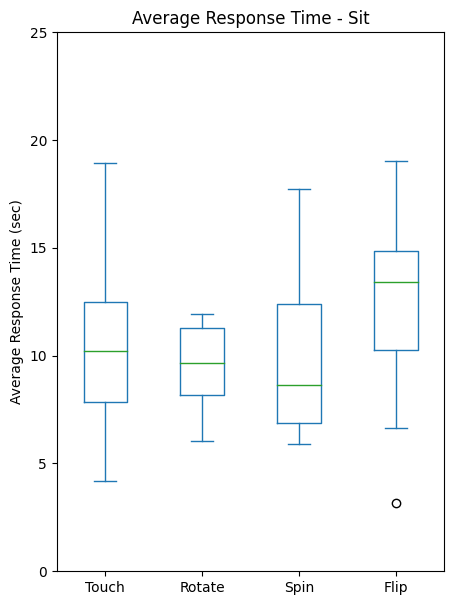

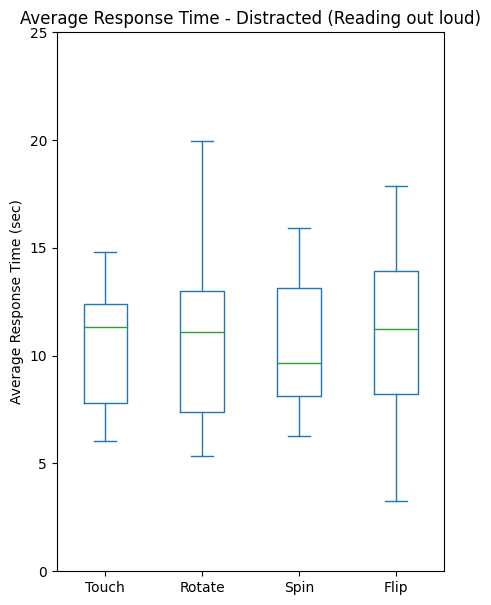

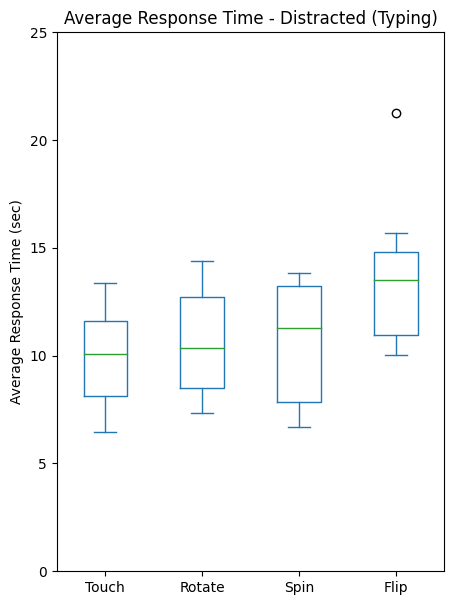

In [229]:
print("--------Average Response Time (seconds) of Participants per Context--------")
avg_resp_by_context= get_avg_response_context(data_by_user)

def plot_avg_resp_by_context_bar(_avg_resp_by_context):    
    for _context in ['Sit', 'Distracted (Reading out loud)', 'Distracted (Typing)'] :
        
        _avg_resp_by_context[_context].index += 1
        plot = _avg_resp_by_context[_context].plot(kind='barh', orientation='horizontal', title="Average Response Time - "+ _context, xlabel="Participant", figsize=(12.5, 7))
        _avg_resp_by_context[_context].index -= 1
        plot.invert_yaxis()
        plot.set_xlabel(xlabel="Average Response Time (sec)")
        plot.set_xlim([0, 25])
        plt.show()

def plot_avg_resp_by_context_box(_avg_resp_by_context):    
    for _context in ['Sit', 'Distracted (Reading out loud)', 'Distracted (Typing)'] :
        
        _avg_resp_by_context[_context].index += 1
        plot = _avg_resp_by_context[_context].plot(kind='box', title="Average Response Time - "+ _context, xlabel="Participant", figsize=(5, 7))
        _avg_resp_by_context[_context].index -= 1
        plot.set_ylim([0, 25])
        plot.set_ylabel(ylabel="Average Response Time (sec)")
        plt.show()

plot_avg_resp_by_context_box(avg_resp_by_context)
# avg_resp_by_context['Sit']